In [1]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

import seaborn as sns 
sns.set(color_codes=True)

import matplotlib.pyplot as plt 

from factor_analyzer import FactorAnalyzer
import pingouin as pg

from scipy import stats

from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

from factor_analyzer.factor_analyzer import calculate_kmo
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

import statsmodels.api as sm

C:\Users\Acer\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\Users\Acer\Anaconda3\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)
C:\Users\Acer\Anaconda3\lib\site-packages\outdated\utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.6, the latest is 0.3.7.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


Please specify a new file path on your computer

In [2]:
df = pd.read_csv("C:/Users/Acer/Downloads/Results lime 30.08.new3.csv")

## Data cleaning

In [3]:
#df.iloc[:,7]
i=7

for column in df:
    while i < 17:
        indicator = i-6
        df.rename(columns={ df.columns[i]: "Risk" + str(indicator)}, inplace = True)
        i+=1
        
    i+=4
    
    while i < 31:
        indicator = i-20
        df.rename(columns={ df.columns[i]: "Loss" + str(indicator)}, inplace = True)
        i+=1
    
    while i < 42:
        indicator = i-30
        df.rename(columns={ df.columns[i]: "WTA" + str(indicator)}, inplace = True)
        i+=1
        
    while i < 53:
        indicator = i-41
        df.rename(columns={ df.columns[i]: "WTP" + str(indicator)}, inplace = True)
        i+=1
        
df.rename(columns={ df.columns[18]: "Career" }, inplace = True)
df.rename(columns={ df.columns[19]: "Finances" }, inplace = True)
df.rename(columns={ df.columns[20]: "In general" }, inplace = True)


i= 53

for column in df:
    while i < 65:
            #indicator = i-41
            df.rename(columns={ df.columns[i]: df.columns[i][70:]}, inplace = True)
            i+=1
    while i < 80:
            #indicator = i-41
            df.rename(columns={ df.columns[i]: df.columns[i][49:]}, inplace = True)
            i+=1

df.rename(columns={ df.columns[80]: "Studycountry" }, inplace = True)
df.rename(columns={ df.columns[81]: "Studyfield" }, inplace = True)
df.rename(columns={ df.columns[82]: "Part-time" }, inplace = True)
df.rename(columns={ df.columns[83]: "Full-time" }, inplace = True)
df.rename(columns={ df.columns[84]: "Self-employed" }, inplace = True)
df.rename(columns={ df.columns[85]: "Not employed" }, inplace = True)
df.rename(columns={ df.columns[86]: "Income" }, inplace = True)
df.rename(columns={ df.columns[87]: "Origincountry" }, inplace = True)
df.rename(columns={ df.columns[88]: "Gender" }, inplace = True)
df.rename(columns={ df.columns[89]: "Age" }, inplace = True)

df.drop(df.columns[90:], axis = 1, inplace = True)

In [4]:
# drop all unnecessary variables
df.drop(["Start language", "Date started", "Date last action", "Seed"], axis = 1, inplace = True)

# leave only full responses
df.dropna(subset=['Date submitted'], inplace = True)

# to assign new indeces
df.reset_index(drop = True, inplace = True)

#pandas take care of NaN
print(round(df["Age"].mean(),0), round(df["Income"].mean(), 2))

# take care of income - 0 values, 10000

23.0 889.5


## Encoding

In [5]:
# option A - risky option, score 0
# option B - safe option, score 1

# Risk aversion dataset
#df.iloc[:,3:13]

# Loss aversion dataset
#df.iloc[:,17:27]

# Self-assessment
#df.iloc[:,14:17]
# original: from low to high willingness to take risks
# reversed: from high to low willingness to take risks
# the higher the number is, the more risk-averse a person is

df.iloc[:,3:13] = df.iloc[:,3:13].replace({"Option A":0, "Option B":1})
df.iloc[:,17:27] = df.iloc[:,17:27].replace({"Option A":0, "Option B":1})
df.iloc[:,14:17] = df.iloc[:,14:17].replace({1:10, 2:9, 3:8, 4:7, 5:6, 6:5, 7:4, 8:3, 9:2, 10:1})

# delete rows with non-consistent values
#13, 15, 52,56,61
df.drop([13, 15, 52, 66, 57, 63, 81], axis = 0, inplace = True)

# to assign new indeces
df.reset_index(drop = True, inplace = True)

## Descriptive statistics

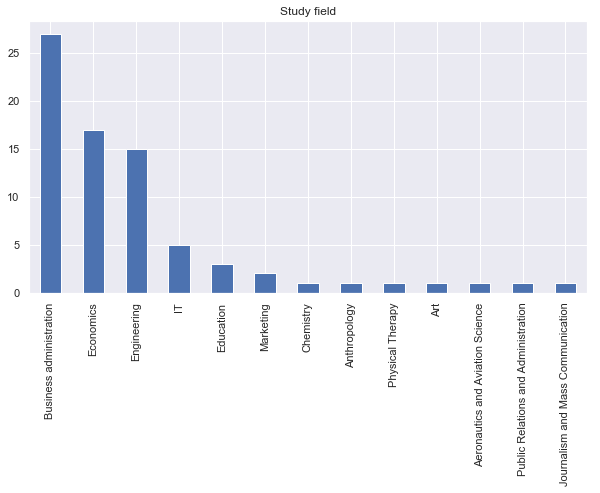

In [6]:
df.Studyfield.value_counts().plot(kind='bar', figsize=(10,5))
plt.title("Study field")
plt.show()

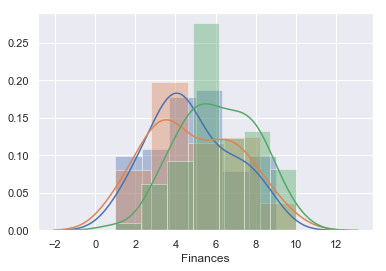

In [7]:
sns.distplot(df['In general'])
sns.distplot(df['Career'])
sns.distplot(df['Finances'])

In [8]:
def compare_2_groups(arr_1, arr_2, alpha, sample_size):
    stat, p = stats.ttest_ind(arr_1, arr_2)
    print(stat, p)
    if p> alpha:
        print('Same distributions (fail to reject H0)')
    else:
        print('Different distributions (reject H0)')

In [9]:
sample_size = 44
compare_2_groups(df['In general'], df['Career'], 0.05,sample_size)

-0.33357746654070647 0.739164274038371
Same distributions (fail to reject H0)


In [10]:
df["In general"].loc[df.Origincountry == 'Germany'].mean()

5.190476190476191

In [11]:
df["In general"].loc[df.Origincountry == 'Ukraine'].mean()

4.55

In [12]:
df["sum_risk"] = df.iloc[:,3:13].sum(axis=1)
df["sum_loss"] = df.iloc[:,17:27].sum(axis=1)

In [13]:
stats.ttest_ind(df.sum_risk, df['In general'], equal_var = False),

(Ttest_indResult(statistic=2.6464664360512096, pvalue=0.009011638912980159),)

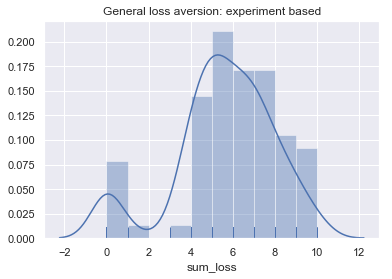

In [14]:
sns.distplot(df.sum_loss, rug=True)
plt.title("General loss aversion: experiment based")
plt.show()

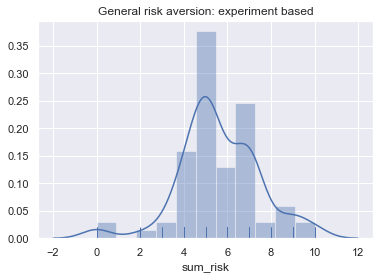

In [15]:
sns.distplot(df.sum_risk, rug=True)
plt.title("General risk aversion: experiment based")
plt.show()

In [16]:
# treatment of the income outlier
#df[df["Income"] == 10000]
#new_income = df.drop([15], axis = 0)
#new_income["Income"].describe()

df.loc[df['Income'] == 0, 'Income'] = float("nan")

#cov_matrix = np.cov(x, y)
#np.corrcoef(x,y)

In [17]:
def calculate_pvalues(df):
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 4)
    return pvalues

In [18]:
new_df = df[['sum_risk', 'sum_loss', 'In general']]

In [19]:
rho = new_df.corr()
rho = rho.round(2)
pval = calculate_pvalues(new_df) # toto_tico's answer
# create three masks
r1 = rho.applymap(lambda x: '{}*'.format(x))
r2 = rho.applymap(lambda x: '{}**'.format(x))
r3 = rho.applymap(lambda x: '{}***'.format(x))
# apply them where appropriate
rho = rho.mask(pval<=0.1,r1)
rho = rho.mask(pval<=0.05,r2)
rho = rho.mask(pval<=0.01,r3)
rho

,sum_risk,sum_loss,In general
sum_risk,1.0***,0.28**,0.12
sum_loss,0.28**,1.0***,0.11
In general,0.12,0.11,1.0***


,sum_risk,sum_loss,In general
sum_risk,1.000000,0.284181,0.123767
sum_loss,0.284181,1.000000,0.107285
In general,0.123767,0.107285,1.000000


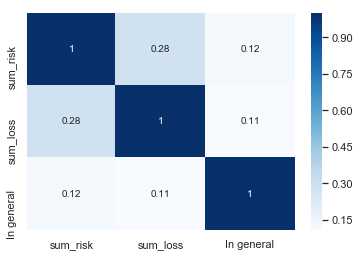

In [20]:
# Finding the relations between the variables.
plt.figure(figsize=(6,4))
c= new_df.corr()
sns.heatmap(c,cmap="Blues",annot=True)
c

In [21]:
df.Income.mean()

792.7435897435897

In [22]:
print(df["Age"].value_counts(), df["Gender"].value_counts(), df["Studycountry"].value_counts(), df["Origincountry"].value_counts(), df["Studyfield"].value_counts(), df["Income"].value_counts(), sep="\n\n")

23.0    16
22.0    12
21.0     7
25.0     7
24.0     5
27.0     4
26.0     3
28.0     3
20.0     3
30.0     2
19.0     2
18.0     2
29.0     1
Name: Age, dtype: int64

Male      39
Female    34
Name: Gender, dtype: int64

Germany               36
Ukraine               12
China                  6
Slovakia               3
Belgium                2
Netherlands            2
France                 2
Turkey                 2
Russian Federation     2
Croatia                1
Denmark                1
Finland                1
Hungary                1
Switzerland            1
Portugal               1
Australia              1
Italy                  1
Belarus                1
Name: Studycountry, dtype: int64

Germany                                                     21
Ukraine                                                     20
Turkey                                                       5
the United Kingdom of Great Britain and Northern Ireland     2
Belgium                                   

In [23]:
df.shape

(76, 88)

## Entrepreneurial propensity

### Factor analysis

In [24]:
df.iloc[:,49:61] = df.iloc[:,49:61].replace({"Much worse": 1, "A little worse":2, "About the same":3, "A little better": 4, "Much better": 5})

In [25]:
chi_square_value,p_value=calculate_bartlett_sphericity(df.iloc[:,49:61])
chi_square_value, p_value

(436.24892665529603, 2.438301975614091e-56)

https://www.datacamp.com/community/tutorials/introduction-factor-analysis

In [26]:
kmo_all,kmo_model = calculate_kmo(df.iloc[:,49:61])
kmo_model

0.7873768622469755

In [27]:
factor_df = df.iloc[:,49:61]

fa = FactorAnalyzer()
fa.set_params(n_factors=12, rotation=None)
fa.fit(factor_df)
loadings = fa.loadings_

ev, v = fa.get_eigenvalues()
ev

array([4.9777807 , 1.57091271, 1.13641508, 0.98403103, 0.92391632,
       0.52375062, 0.49994609, 0.48140131, 0.29606307, 0.25084833,
       0.201555  , 0.15337975])

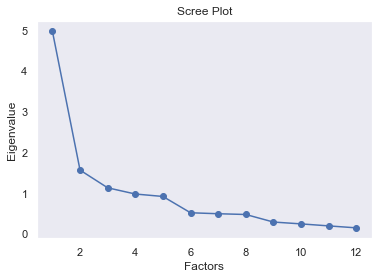

In [28]:
# Create scree plot using matplotlib
plt.scatter(range(1,factor_df.shape[1]+1),ev)
plt.plot(range(1,factor_df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [29]:
fa = FactorAnalyzer()
fa.set_params(n_factors = 3, rotation = "varimax")
fa.fit(factor_df)
loadings = fa.loadings_

In [30]:
load = pd.DataFrame.from_records(loadings)
load.head()

,0,1,2
0,0.273778,0.214912,0.489348
1,0.003935,-0.015722,0.125524
2,0.182399,0.771426,0.044491
3,0.250682,-0.047392,0.467587
4,0.262388,0.203462,0.874899


In [31]:
fa.get_factor_variance()

(array([2.71028061, 2.05655374, 1.78743164]),
 array([0.22585672, 0.17137948, 0.14895264]),
 array([0.22585672, 0.3972362 , 0.54618883]))

In [32]:
load.loc[abs(load.loc[:,0]) > 0.55, 'business_talent'] = 'business_talent'
load.loc[abs(load.loc[:,1]) > 0.55, 'creativity'] = 'creativity'
load.loc[abs(load.loc[:,2]) > 0.55, 'leadership'] = 'leadership'

In [33]:
fa.get_communalities()

array([0.36060284, 0.01601887, 0.63034733, 0.28372522, 0.87569177,
       0.35169916, 0.60941565, 0.55436323, 0.92860982, 0.60863634,
       0.75358112, 0.58157463])

In [34]:
load

,0,1,2,business_talent,creativity,leadership
0,0.273778,0.214912,0.489348,NaN,NaN,NaN
1,0.003935,-0.015722,0.125524,NaN,NaN,NaN
2,0.182399,0.771426,0.044491,NaN,creativity,NaN
3,0.250682,-0.047392,0.467587,NaN,NaN,NaN
4,0.262388,0.203462,0.874899,NaN,NaN,leadership
5,0.110849,0.151635,0.562511,NaN,NaN,leadership
6,0.697421,0.316903,0.150306,business_talent,NaN,NaN
7,0.499075,0.541082,0.111884,NaN,NaN,NaN
8,0.304817,0.907444,0.110640,NaN,creativity,NaN
9,0.711786,0.272312,0.166861,business_talent,NaN,NaN


0. solve problems?
1. manage money?
2. be creative? 
3. get people to agree with you?
4. be a leader? 
5. make decisions?
6. successfully identify new business opportunitites?
7. create new products?
8. think creatively?
9. commericalize an idea or new development?
10. raise funds for a new business?
11. sell new product or service?

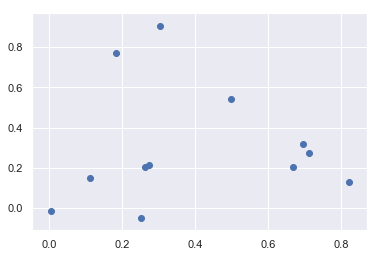

In [35]:
plt.scatter(load[0], load[1], marker='o');
#plt.ylim(-1, 1);
#plt.xlim(-1, 1);

https://datasciencetips.com/use-factor-analysis-to-better-understand-your-data/

A factor is a latent variable which describes the association among the number of observed variables. The maximum number of factors are equal to a number of observed variables. Every factor explains a certain variance in observed variables. The factors with the lowest amount of variance were dropped. Factors are also known as latent variables or hidden variables or unobserved variables or Hypothetical variables.

Factor loadings – The factor loading is a matrix which shows the relationship of each variable to the underlying factor. It shows the correlation coefficient for observed variable and factor and variance explained by the observed variables

Eigenvalues – represent variance explained each factor from the total variance. It is also known as characteristic roots.

Communalities – are the sum of the squared loadings for each variable. It represents the common variance. It ranges from 0-1 and value close to 1 represents more variance.

Factor Rotation is a tool for better interpretation of factor analysis. Rotation can be orthogonal or oblique. It re-distributed the commonalities with a clear pattern of loadings.

In [36]:
#Create the factors
factor1 = df[['[be creative?]', '[think creatively?]']] #creativity
factor2 = df[['[commericalize an idea or new development?]',
       '[raise funds for a new business?]',
       '[sell new product or service?]', '[successfully identify new business opportunitites?]']] #business
factor3 = df[['[be a leader?]', '[make decisions?]']] #leadership
#factor4 = df[['[solve problems?]']]

#Get cronbach alpha
factor1_alpha = pg.cronbach_alpha(factor1)
factor2_alpha = pg.cronbach_alpha(factor2)
factor3_alpha = pg.cronbach_alpha(factor3)
print(factor1_alpha, factor2_alpha, factor3_alpha)

(0.8719773137406548, array([0.798, 0.919])) (0.866227525064214, array([0.809, 0.909])) (0.6789114938342262, array([0.493, 0.797]))


The alpha coefficient for the four items is .84 and .81, suggesting that the items have relatively high internal consistency.  (Note that a reliability coefficient of .70 or higher is considered “acceptable” in most social science research situations.)

### Adding new factors to the dataframe

In [37]:
x = fa.transform(factor_df.values)
x = pd.DataFrame(x)

df = pd.concat([df,x], axis = 1, sort = False)
df.rename(columns = {0:'business_talent', 1:'creativity', 2:'leadership'}, inplace = True)

#new_row = pd.Series(data = {'[solve problems?]':3, '[manage money?]':3, '[be creative?]':3,
       #'[get people to agree with you?]':3, '[be a leader?]':3,
       #'[make decisions?]':3,
       #'[successfully identify new business opportunitites?]':3,
       #'[create new products?]':3, '[think creatively?]':3,
       #'[commericalize an idea or new development?]':3,
       #'[raise funds for a new business?]':3, '[sell new product or service?]':3}, name = 'test')
#factor_df = factor_df.append(new_row, ignore_index=True) 

In [38]:
df.creativity.median(), df.business_talent.median(), df.leadership.median()

(0.10676167962157289, 0.01566959359806616, 0.1687945866404686)

,creativity,business_talent,leadership
creativity,1.000000,0.070524,-0.011272
business_talent,0.070524,1.000000,0.083308
leadership,-0.011272,0.083308,1.000000


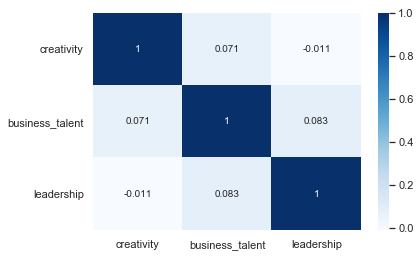

In [39]:
# Finding the relations between the variables.
plt.figure(figsize=(6,4))
c= df[['creativity', 'business_talent', 'leadership']].corr()
sns.heatmap(c,cmap="Blues",annot=True)
c

(<matplotlib.axes._subplots.AxesSubplot at 0x1d3c6241c88>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1d3c6241c88>)

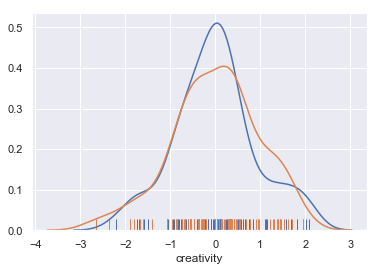

In [40]:
sns.distplot(df.business_talent, hist=False, rug=True), sns.distplot(df.creativity, hist=False, rug=True)
#df.creativity.describe(), df.business_talent.describe()

# orange - creativity
# blue - business talent

## Linear regression & final results

In [41]:
X = df[['creativity', 'business_talent', 'leadership']]

y_s = df['Finances']
y_ex_loss = df.sum_loss
y_ex_risk = df.sum_risk

In [42]:
def lin_reg_fun(X,y):
    X = sm.add_constant(X)
    model = sm.OLS(y, X)
    results = model.fit()
    print(results.summary())
    
    fig = sm.graphics.plot_partregress_grid(results)
    fig.tight_layout(pad=1.0)
    return(results)

Risk aversion, survey-based

                            OLS Regression Results                            
Dep. Variable:               Finances   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.182
Method:                 Least Squares   F-statistic:                     6.560
Date:                Tue, 01 Sep 2020   Prob (F-statistic):           0.000553
Time:                        18:38:14   Log-Likelihood:                -148.10
No. Observations:                  76   AIC:                             304.2
Df Residuals:                      72   BIC:                             313.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               6.1053      0.200     

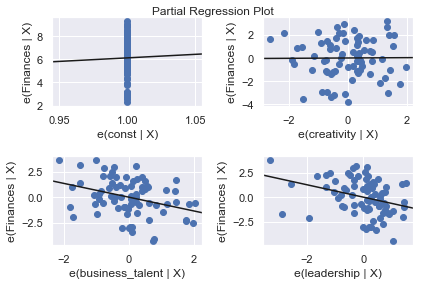

In [43]:
results = lin_reg_fun(X,y_s)

Loss aversion

                            OLS Regression Results                            
Dep. Variable:               sum_loss   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     3.096
Date:                Tue, 01 Sep 2020   Prob (F-statistic):             0.0321
Time:                        18:38:15   Log-Likelihood:                -168.20
No. Observations:                  76   AIC:                             344.4
Df Residuals:                      72   BIC:                             353.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               5.6053      0.261     

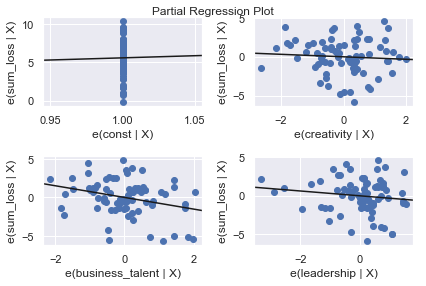

In [44]:
results = lin_reg_fun(X,y_ex_loss)

Risk aversion experimental-based

                            OLS Regression Results                            
Dep. Variable:               sum_risk   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.129
Date:                Tue, 01 Sep 2020   Prob (F-statistic):              0.343
Time:                        18:38:15   Log-Likelihood:                -152.53
No. Observations:                  76   AIC:                             313.1
Df Residuals:                      72   BIC:                             322.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               5.6184      0.212     

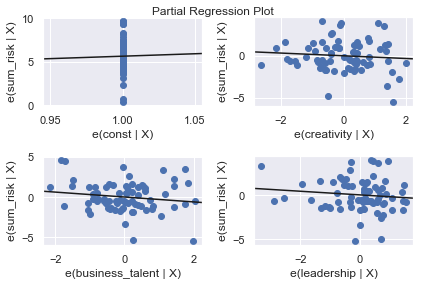

In [45]:
results = lin_reg_fun(X,y_ex_risk)

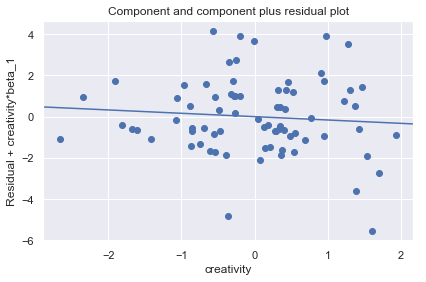

In [46]:
fig = sm.graphics.plot_ccpr(results, "creativity")
fig.tight_layout(pad=1.0)